In [1]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

 - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html
 - http://localhost:8888/tree/cookbook/python/scientific/stats#running
 - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html

In [2]:
N = 100000

In [3]:
np.random.seed(123456)

In [4]:
X = stats.lognorm(0.5, loc=0, scale=1.5)

In [5]:
xs = X.rvs(N)

In [6]:
x = np.linspace(0, np.max(xs)*1.1, 1000)

In [7]:
f = stats.lognorm.fit(xs, floc=0)

In [8]:
Xf = stats.lognorm(*f)

In [9]:
Xkde = stats.gaussian_kde(xs)

In [10]:
pdf = X.pdf(x)

In [11]:
mle = Xf.pdf(x)

In [12]:
kde = Xkde.evaluate(x)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


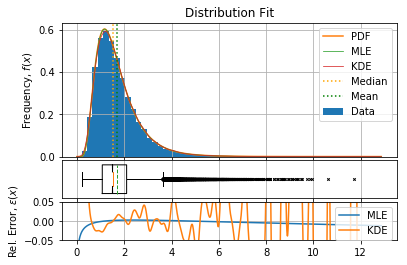

In [13]:
fig, axe = plt.subplots(3, 1, sharex=True, gridspec_kw={'hspace': 0.05, 'height_ratios': [7, 2, 2]})
H = axe[0].hist(xs, bins=50, density=True, label="Data")
axe[0].plot(x, pdf, label="PDF")
axe[0].plot(x, mle, linewidth=0.75, label="MLE")
axe[0].plot(x, kde, linewidth=0.75, label="KDE")
axe[0].axvline(np.median(xs), linestyle=':', color='orange', label='Median')
axe[0].axvline(np.mean(xs), linestyle=':', color='green', label='Mean')
axe[0].legend()
axe[1].boxplot(xs, vert=False, notch=True, showmeans=True, meanline=True, flierprops={'marker':'x', 'markersize': 2.5})
axe[2].plot(x, (mle-pdf)/pdf, label="MLE")
axe[2].plot(x, (kde-pdf)/pdf, label="KDE")
axe[2].legend()
axe[2].set_ylim(np.array([-1,1])*0.05)
axe[0].set_title("Distribution Fit")
axe[1].set_xlabel("Random Variable $x$")
axe[0].set_ylabel("Frequency, $f(x)$")
axe[2].set_ylabel(r"Rel. Error, $\epsilon (x)$")
axe[1].set_yticks([])
axe[1].set_ylim([0.9, 1.1])
for i in range(3):
    axe[i].grid()
fig.savefig("Lognorm.png", dpi=180)

In [14]:
result = scipy.integrate.quad(Xkde.evaluate, 0, 20)
result

(0.999998290089158, 1.2017208171089878e-08)

In [15]:
import inspect

In [16]:
inspect.getfile(stats.beta.ppf)

'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\scipy\\stats\\_distn_infrastructure.py'

In [17]:
print("\n".join(inspect.findsource(stats.beta.ppf)[0]))

#

# Author:  Travis Oliphant  2002-2011 with contributions from

#          SciPy Developers 2004-2011

#

from __future__ import division, print_function, absolute_import



from scipy._lib.six import string_types, exec_, PY3

from scipy._lib._util import getargspec_no_self as _getargspec



import sys

import keyword

import re

import types

import warnings



from scipy.misc import doccer

from ._distr_params import distcont, distdiscrete

from scipy._lib._util import check_random_state, _lazywhere, _lazyselect

from scipy._lib._util import _valarray as valarray



from scipy.special import (comb, chndtr, entr, rel_entr, kl_div, xlogy, ive)



# for root finding for discrete distribution ppf, and max likelihood estimation

from scipy import optimize



# for functions of continuous distributions (e.g. moments, entropy, cdf)

from scipy import integrate



# to approximate the pdf of a continuous distribution given its cdf

from scipy.misc import derivative



from numpy import (ar